In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("iris.xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Finding duplicates and removing them

In [7]:
data.duplicated().sum()

3

In [8]:
data=data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

In [10]:
#To find missing values
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

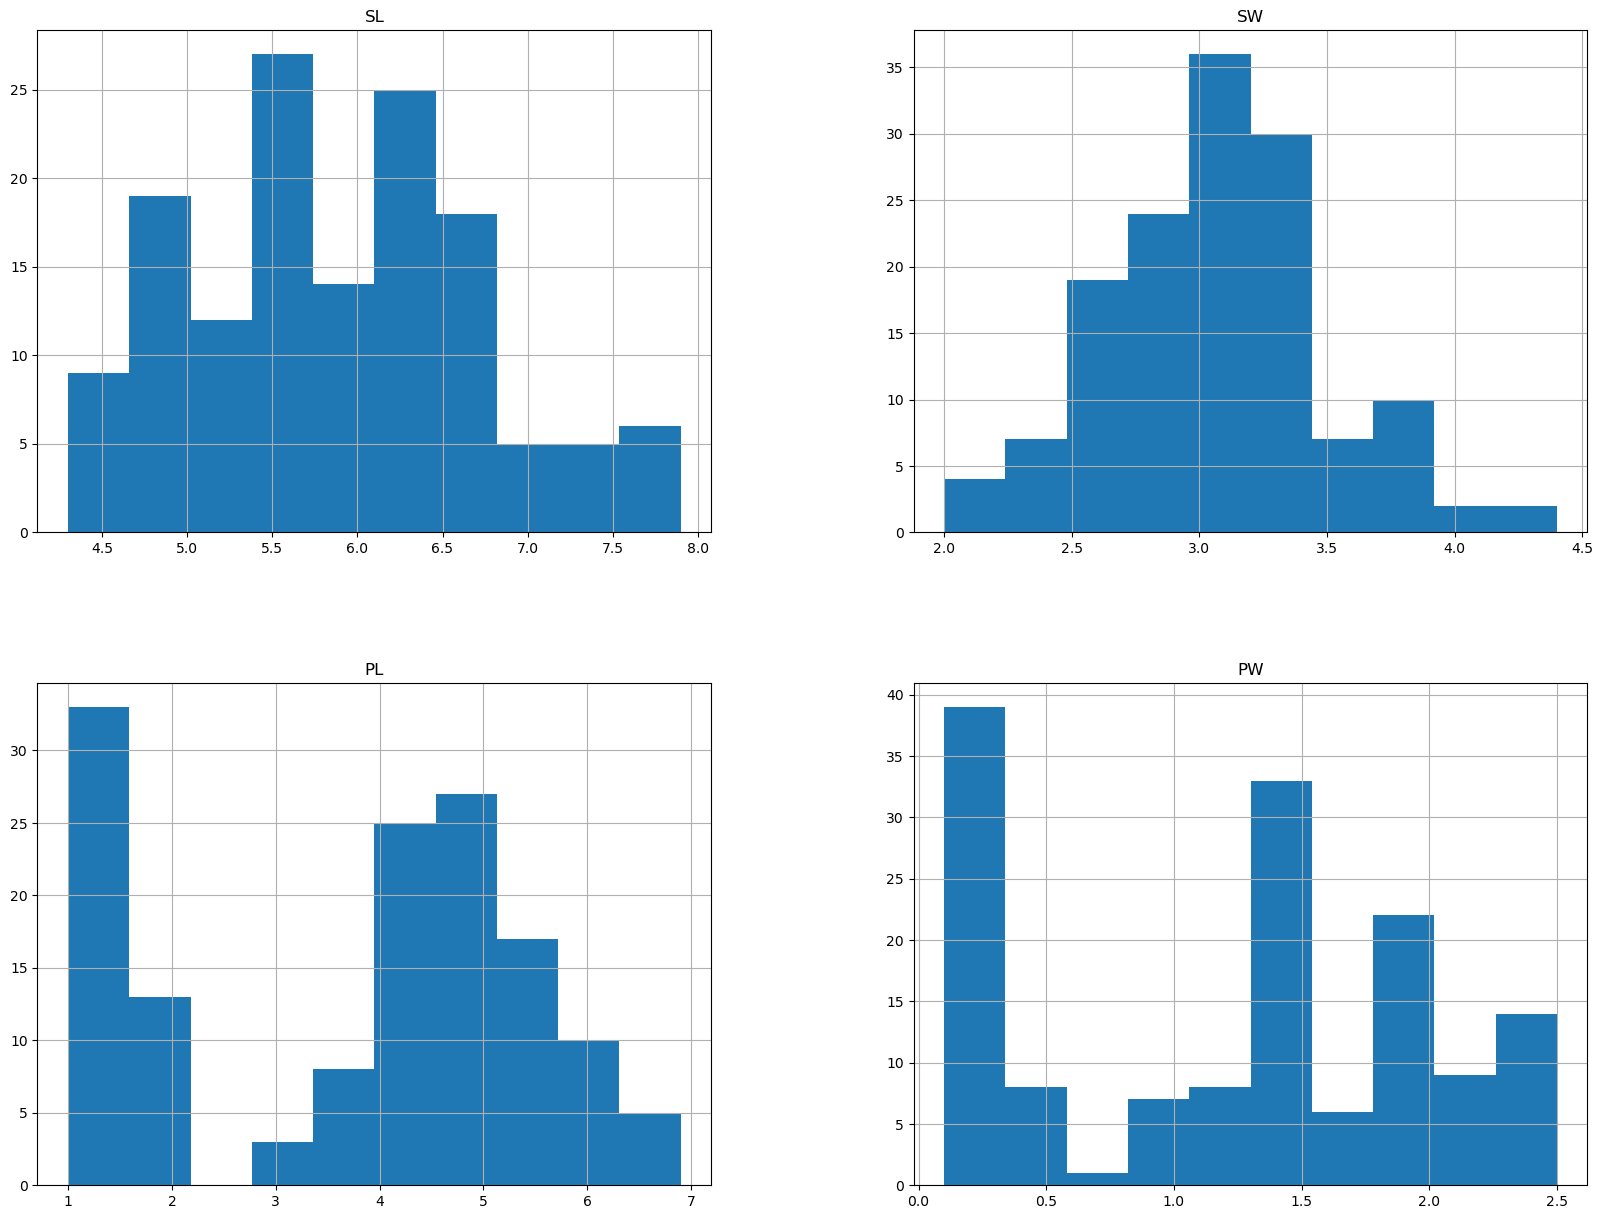

In [11]:
#Treating missing values
#Plotting histogram to know whether the graph is normal or skewed so that we can replace them with mean or median
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [12]:
data['SL']=data['SL'].fillna(data['SL'].median())

In [13]:
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [15]:
org_data=data.copy()

In [16]:
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Dividing data into predictor and target

In [17]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [18]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(solver='lbfgs',max_iter=400)

In [22]:
log_model=log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)

In [23]:
y_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [24]:
y_test

127    2
53     1
140    2
19     0
106    2
12     0
78     1
31     0
83     1
9      0
26     0
98     1
146    2
69     1
136    2
68     1
18     0
71     1
126    2
30     0
29     0
107    2
38     0
120    2
57     1
22     0
66     1
135    2
84     1
11     0
Name: Classification, dtype: int32

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [26]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 1,  8,  1],
       [ 0,  1,  8]], dtype=int64)

In [27]:
print('Accuracy=',accuracy_score(y_test,y_pred))

Accuracy= 0.9


# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
metric_k=[]
neighbors= np.arange(3,15)

In [30]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)
    

In [31]:
metric_k

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

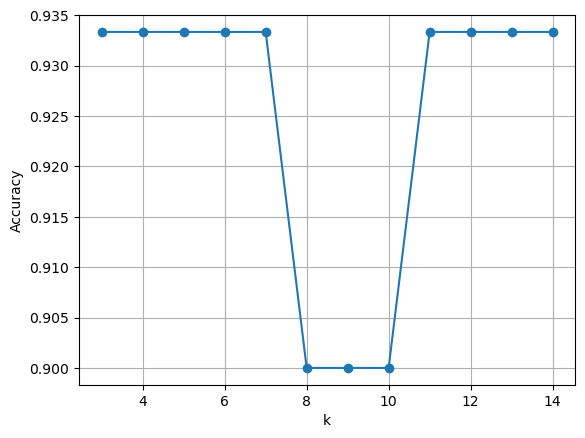

In [32]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [33]:
classifier=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)

In [34]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,pos_label='positive',average='micro'))
print('Recall=',recall_score(y_test,y_predictions,pos_label='positive',average='micro'))
print('F1 Score=',f1_score(y_test,y_predictions,pos_label='positive',average='micro'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.9333333333333333
Precision= 0.9333333333333333
Recall= 0.9333333333333333
F1 Score= 0.9333333333333333


array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

# CONCLUSION